In [9]:
#importo las librerias que voy a utilizar para el proceso
import pandas as pd
import missingno as msno 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
import numpy as np
import seaborn as sns

In [105]:
#Importo el Data Frame para el entrenamiento del modelo
dF_inmuebles_train=pd.read_parquet('train.parquet')

In [106]:
#importo el Data Frame para la prediccion del modelo
dF_inmuebles_test=pd.read_parquet('test.parquet')

In [107]:
#se buscan filas duplicadas
dF_inmuebles_train[dF_inmuebles_train.duplicated()]

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state


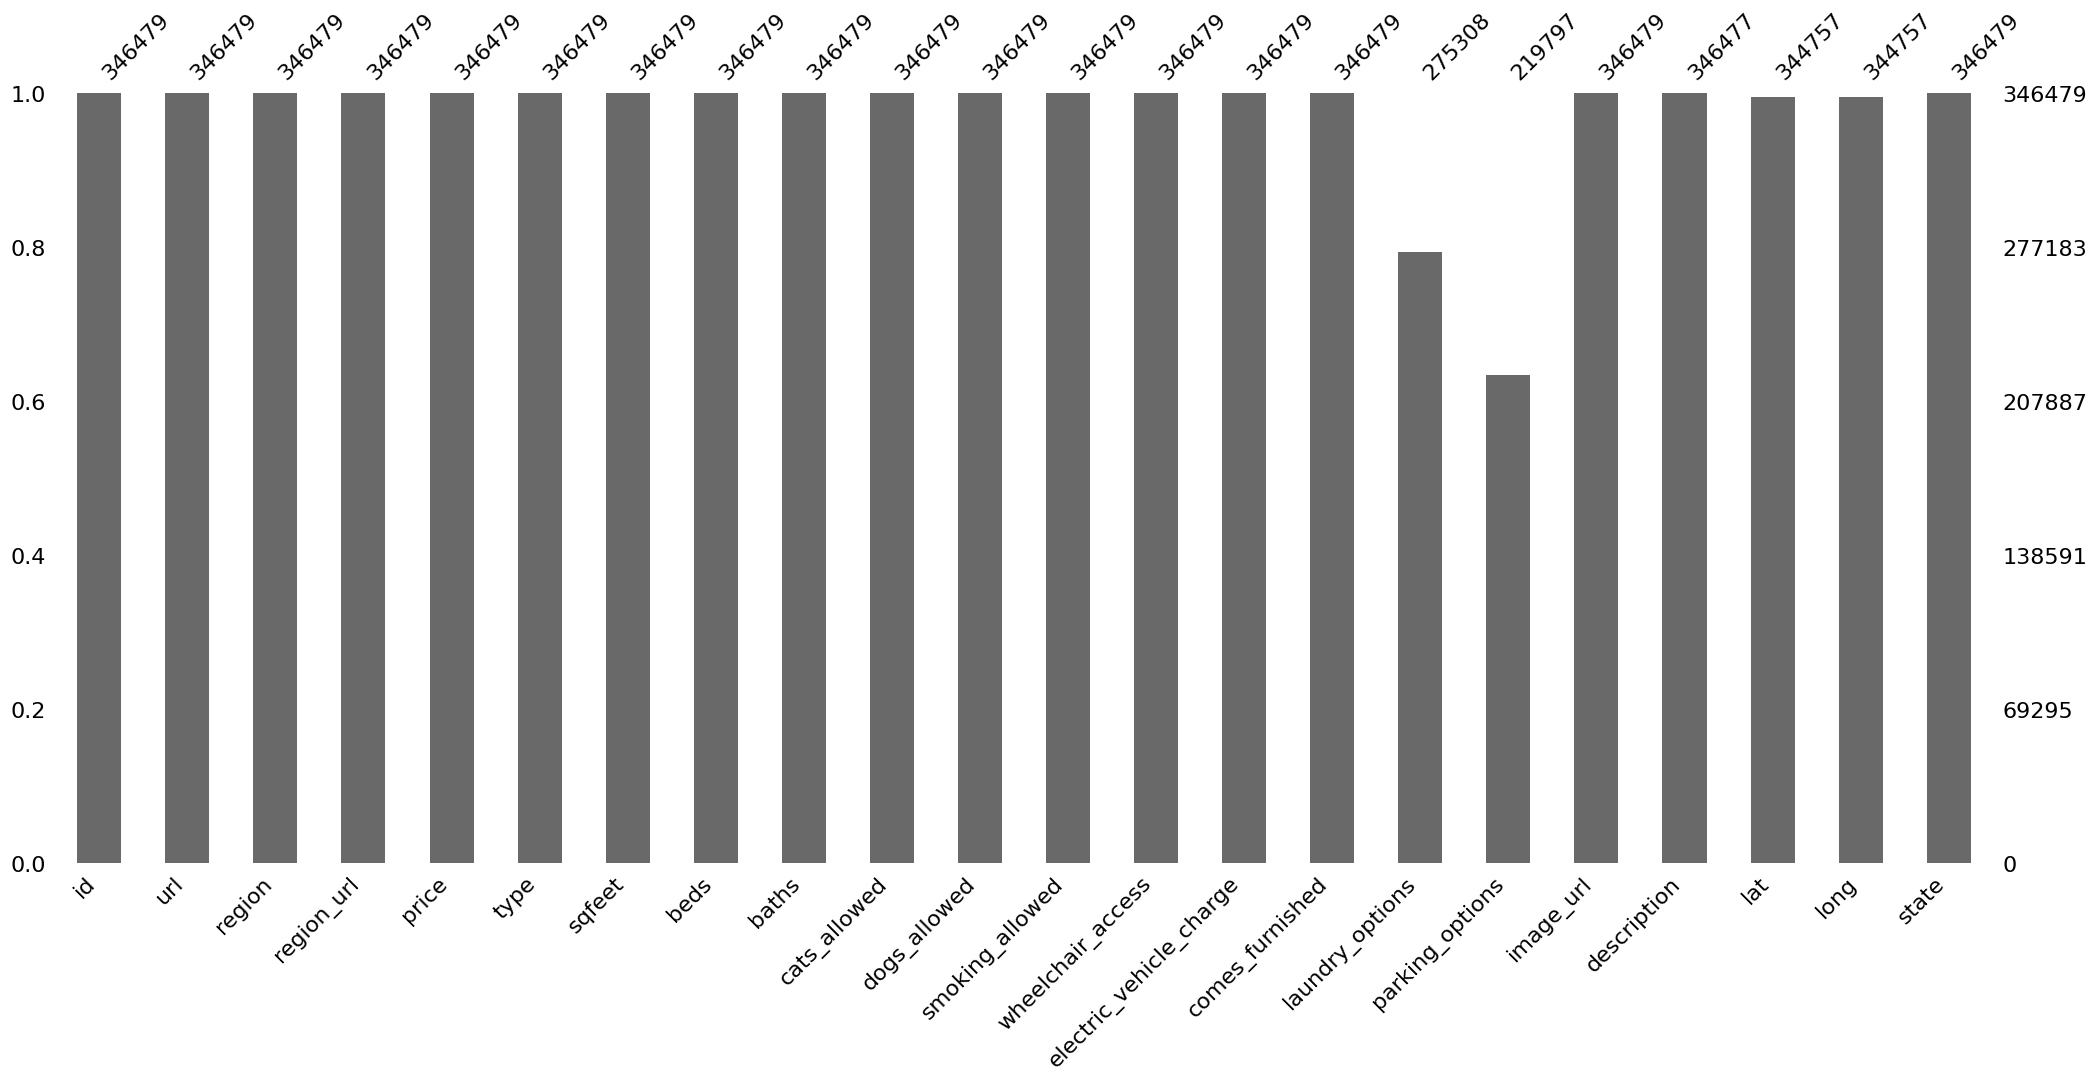

In [108]:

msno.bar(dF_inmuebles_train)
plt.show()# grafico para ver representado los valores faltantes

In [109]:
dF_inmuebles_train["laundry_options"].fillna("S/D", inplace = True) #reemplazo valores faltantes de la columna laundry_options

In [110]:
dF_inmuebles_train["parking_options"].fillna('S/D', inplace=True)#reemplazo valores faltantes de la columna parking_options

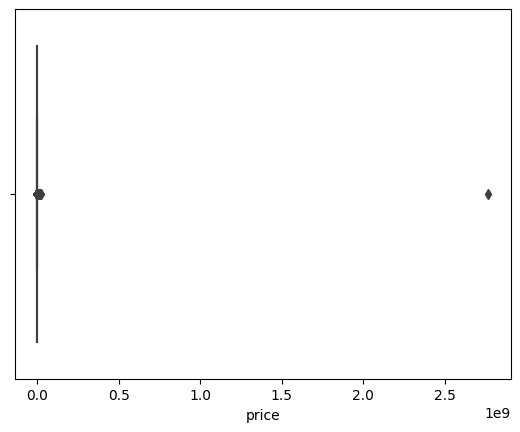

In [111]:
sns.boxplot(x = 'price', data = dF_inmuebles_train)# busco valores atipicos en la columna price dondeobservo un valor extremadamente alto
plt.show()

In [112]:
#uso la tecnica rango intercuantilico para la eliminacion de outliers en la columna price, ya que la misma es de importancia para la prediccion
Q1 = dF_inmuebles_train['price'].quantile(0.25)
Q3 = dF_inmuebles_train['price'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR

print(Q1)
print(Q3)
print(IQR)
print(BI)
print(BS)

805.0
1395.0
590.0
-80.0
2280.0


In [113]:
print('Cantidad de registros totales:', dF_inmuebles_train.shape[0])
print('Cantidad de outliers:', dF_inmuebles_train[(dF_inmuebles_train['price']<BI) | (dF_inmuebles_train['price']>BS)].shape[0] )

Cantidad de registros totales: 346479
Cantidad de outliers: 16903


In [114]:
price_sin_outlier = (dF_inmuebles_train['price']<BI) | (dF_inmuebles_train['price']>BS) #eliminamos outliers columna price

dF_inmuebles_train = dF_inmuebles_train[~price_sin_outlier]

In [115]:
print('Tamaño del dataset, luego de eliminar outliers en GrLivArea:', dF_inmuebles_train.shape[0])

Tamaño del dataset, luego de eliminar outliers en GrLivArea: 329576


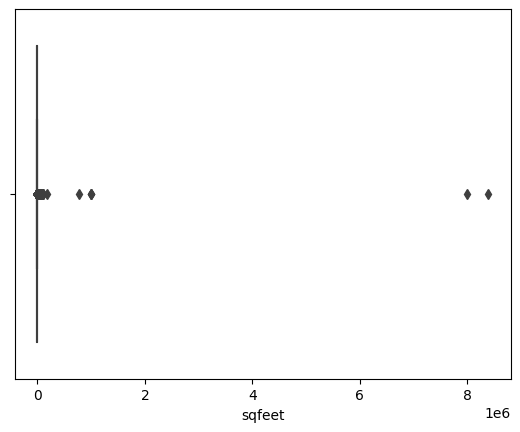

In [116]:
sns.boxplot(x = 'sqfeet', data = dF_inmuebles_train)# busco valores atipicos en la columna sqfeet
plt.show()

In [117]:
#uso la tecnica rango intercuantilico para la eliminacion de outliers en la columna sqfeet
Q1 = dF_inmuebles_train['sqfeet'].quantile(0.25)
Q3 = dF_inmuebles_train['sqfeet'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR

print(Q1)
print(Q3)
print(IQR)
print(BI)
print(BS)

750.0
1125.0
375.0
187.5
1687.5


In [118]:
print('Cantidad de registros totales:', dF_inmuebles_train.shape[0])
print('Cantidad de outliers:', dF_inmuebles_train[(dF_inmuebles_train['sqfeet']<BI) | (dF_inmuebles_train['sqfeet']>BS)].shape[0] )

Cantidad de registros totales: 329576
Cantidad de outliers: 13019


In [119]:
sqfeet_sin_outlier = (dF_inmuebles_train['sqfeet']<BI) | (dF_inmuebles_train['sqfeet']>BS) #eliminamos outliers de sqfeet

dF_inmuebles_train = dF_inmuebles_train[~sqfeet_sin_outlier]

In [120]:
dF_inmuebles_train.shape[0]

316557

In [121]:
from sklearn.preprocessing import OneHotEncoder

In [122]:

le = preprocessing.LabelEncoder()#codifico variabes categoricas, utilizo label encoder ya que el numero de caracterizticas categoricas es muy grande
dF_inmuebles_train['type2'] = le.fit_transform(dF_inmuebles_train['type'])


In [123]:
le = preprocessing.LabelEncoder()#codifico variabes categoricas 
dF_inmuebles_train['laundry_options2'] = le.fit_transform(dF_inmuebles_train['laundry_options'])

In [124]:
dF_inmuebles_train['parking_options2'] = le.fit_transform(dF_inmuebles_train['parking_options'])#codifico variabes categoricas 

In [125]:
dF_inmuebles_train.drop(['type','url', 'region_url','image_url','lat','long','state','region','description','parking_options', 'laundry_options'], axis = 'columns', inplace=True)#elimino columnas que no aportan dtos significativos o que codifique

In [126]:
dF_inmuebles_train.head(3)

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,type2,laundry_options2,parking_options2
0,7048013474,1350,1200,2,2.0,1,1,1,0,0,0,6,5,3
1,7043931179,1115,694,1,1.0,1,1,1,0,0,0,0,5,2
2,7048254516,1129,900,2,2.0,0,0,1,0,0,0,0,4,5


In [127]:
dF_inmuebles_train['category_price'] = np.where(dF_inmuebles_train['price']<=999, 1, 0)#defino la columna category_price

In [128]:
def plot_corre_heatmap(corr):
    '''
    Defino una función para ayudarme a graficar un heatmap de correlación
    '''
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.2f'
                ,annot_kws={'size': 15},cmap= 'coolwarm')
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    b, t = plt.ylim() 
    b += 0.5 
    t -= 0.5 
    plt.ylim(b, t) 
    plt.show()

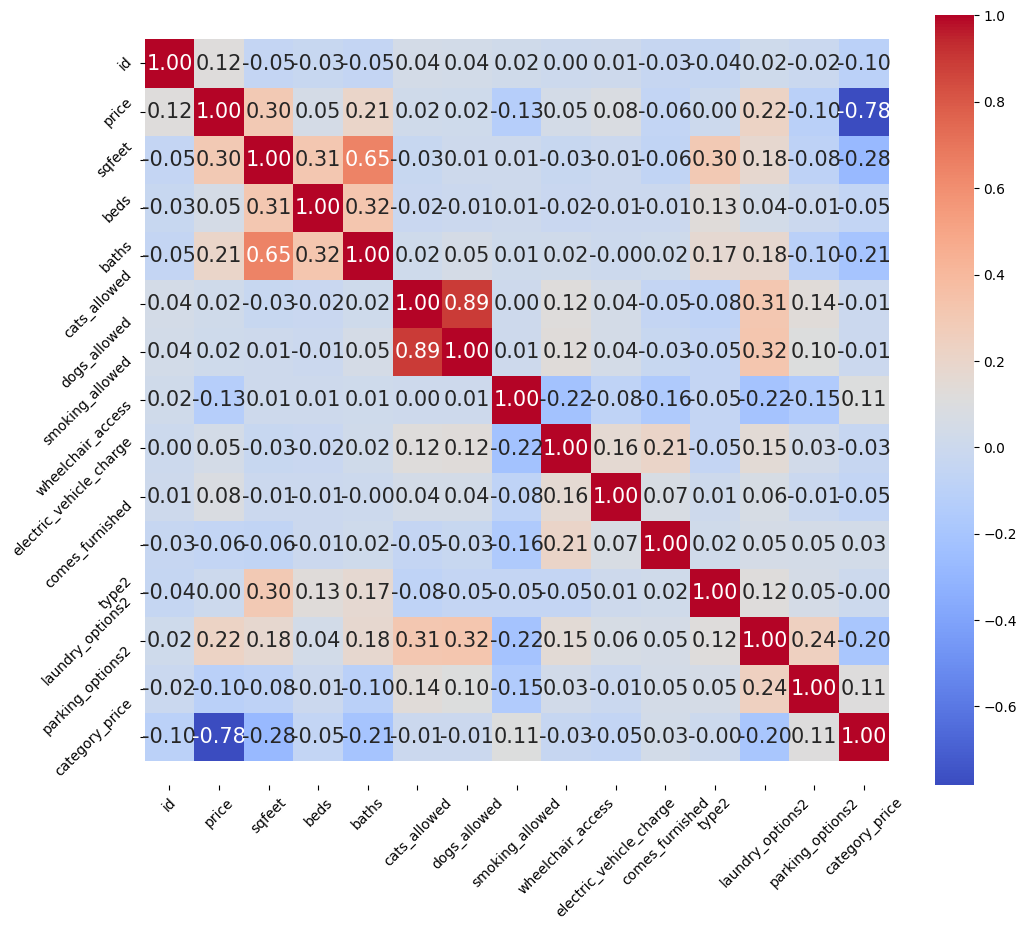

In [129]:
corr = dF_inmuebles_train.corr()#visualizo el mapa de correlacion
plot_corre_heatmap(corr)

In [130]:
dF_inmuebles_train.drop(['price'], axis = 'columns', inplace=True)#elimino la columna price ya que no esta en data frame de testeo

In [131]:
le = preprocessing.LabelEncoder()#codifico variabes categoricas en el data frame de testeo
dF_inmuebles_test['type2'] = le.fit_transform(dF_inmuebles_test['type'])
dF_inmuebles_test['laundry_options2'] = le.fit_transform(dF_inmuebles_test['laundry_options'])
dF_inmuebles_test['parking_options2'] = le.fit_transform(dF_inmuebles_test['parking_options'])



In [132]:
dF_inmuebles_test.drop(['type','url', 'region_url','image_url','lat','long','state','region','description',
'parking_options', 'laundry_options',], axis = 'columns', inplace=True)#elimino las mismas columnas que elimine en el data frame de entrenamiento

In [133]:
X = dF_inmuebles_train[['sqfeet','baths','beds','cats_allowed','wheelchair_access','laundry_options2','type2','parking_options2', 'dogs_allowed']]
y = dF_inmuebles_train['category_price'] #defino las variables x e y para el entrenamiento y defino la columna a predecir

In [134]:
from sklearn.model_selection import train_test_split#hago la separacion entre datos de entrenamiento y datos de testeo 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [135]:
from sklearn.tree import DecisionTreeClassifier#importo para utilizar el objeto que me va a permitir predecir con el metodo arbol

In [136]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier   #importo lo necesario para buscar la profundidad mas optima para mi modelo
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from IPython.display import clear_output

In [137]:
tree_train_scores_mean = [] #hago una funcion para evaluar cual profundidad del arbol seria mas efectiva
tree_train_scores_std = []
tree_test_scores_mean = []
tree_test_scores_std = []

profundidades = np.arange(1,20,1)
i = 0
i_max = len(profundidades)
for profundidad in profundidades:
    i = i + 1
    clf = DecisionTreeClassifier(max_depth=profundidad)
    tree_scores = cross_validate(clf, X, y, cv=5, return_train_score=True, n_jobs = -1)
    
    tree_train_scores_mean.append(tree_scores['train_score'].mean())
    tree_train_scores_std.append(tree_scores['train_score'].std())
    
    tree_test_scores_mean.append(tree_scores['test_score'].mean())
    tree_test_scores_std.append(tree_scores['test_score'].std())
    
    clear_output(wait=True)
    print('Completado: ' + str(round(i / i_max * 100, 2)) + '%')

tree_train_scores_mean = np.array(tree_train_scores_mean)
tree_train_scores_std = np.array(tree_train_scores_std)
tree_test_scores_mean = np.array(tree_test_scores_mean)
tree_test_scores_std = np.array(tree_test_scores_std)

Completado: 100.0%


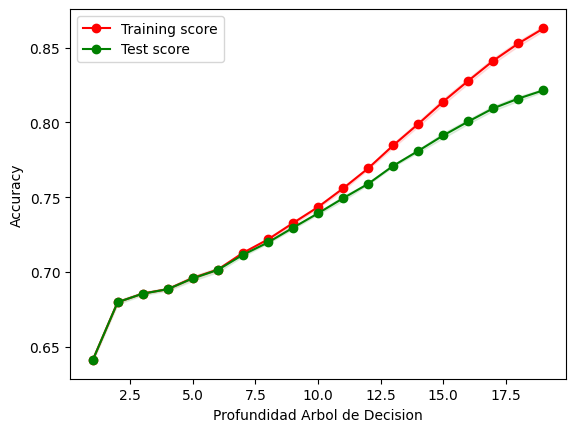

In [138]:
plt.fill_between(profundidades, tree_train_scores_mean - tree_train_scores_std,#grafico los  resultados de la funcion para poder observar que profundidad es mas efectiva en el arbol
                 tree_train_scores_mean + tree_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(profundidades, tree_test_scores_mean - tree_test_scores_std,
                 tree_test_scores_mean + tree_test_scores_std, alpha=0.1, color="g")

plt.plot(profundidades, tree_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(profundidades, tree_test_scores_mean, 'o-', color="g",
         label="Test score")

plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Profundidad Arbol de Decision')
plt.show()

In [167]:
arbol = DecisionTreeClassifier(max_depth = 10)#paso hiperparametro de profundidad, en el valor que vi mas acertado en el modelo de testeo

In [165]:
arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8)

In [166]:
from sklearn.metrics import accuracy_score

# Predecimos sobre nuestro set de entrenamieto
y_train_pred = arbol.predict(X_train)

# Predecimos sobre nuestro set de test
y_test_pred = arbol.predict(X_test)

# Comaparamos con las etiquetas reales
print('Porcentaje de aciertos sobre el conjunto de Entrenamiento:', accuracy_score(y_train_pred,y_train))
print('Porcentaje de aciertos sobre el conjunto de Evaluación:', accuracy_score(y_test_pred,y_test))

Porcentaje de aciertos sobre el conjunto de Entrenamiento: 0.7225848486643369
Porcentaje de aciertos sobre el conjunto de Evaluación: 0.7208428102097548


In [142]:
X_test2= dF_inmuebles_test[['sqfeet','baths','beds','cats_allowed','wheelchair_access','laundry_options2','type2','parking_options2', 'dogs_allowed']]#defino las columnas a utilizar para el test de prediccion


In [143]:
pred_test=arbol.predict(X_test2)#hago laprediccion sobre el data frame de testeo

In [144]:
pred_test

array([0, 1, 0, ..., 1, 1, 1])

In [145]:
prediccion=pd.DataFrame(pred_test)#transformo el array del resultado de la prediccion en un data frame

In [146]:
prediccion.columns = ['pred']#llamo a la columna de predicion 'pred'

In [55]:
prediccion.to_csv('juangarciare.csv', index=False)#convierto el data frame a un archivo csv sin el indice